In [36]:
#Brute-Force Matching with ORB descriptors
#Brute-Force Matching with SIFT descriptors and ratio test
#FLANN based matcher

In [37]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [39]:
reeses = cv.imread('DATA/reeses_puffs.png',0)

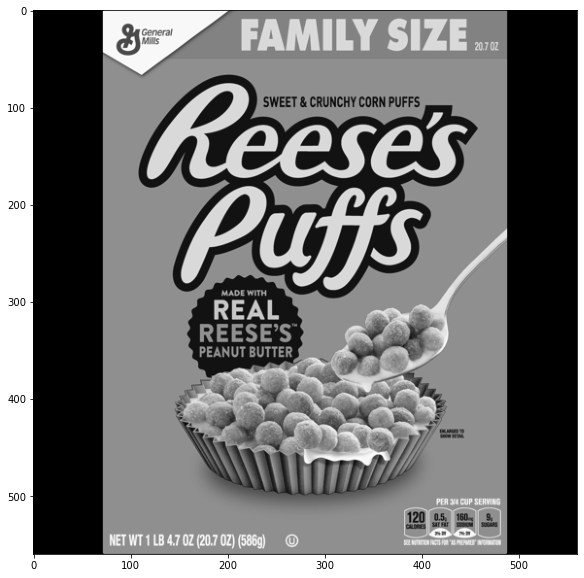

In [40]:
display(reeses)

In [41]:
cereals = cv.imread('DATA/many_cereals.jpg',0)

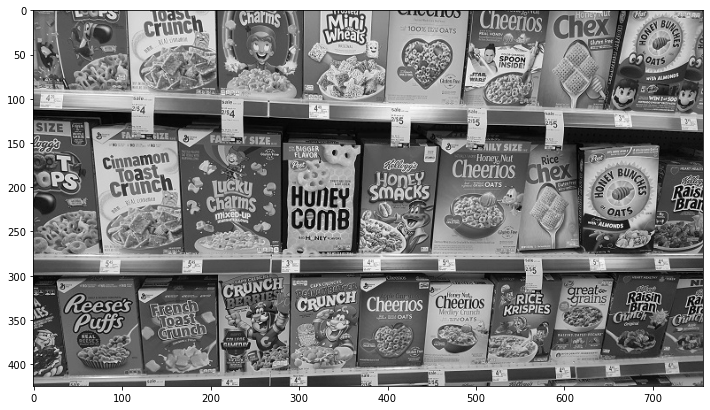

In [42]:
display(cereals)

In [43]:
#1st method

orb = cv.ORB_create()

In [82]:
#takes image and mask
#detects keypoints and computes the descriptors
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [83]:
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

In [84]:
matches = bf.match(des1,des2)

In [85]:
#sort acc to distance

matches = sorted(matches, key=lambda x:x.distance)

In [86]:
reeses_matches = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

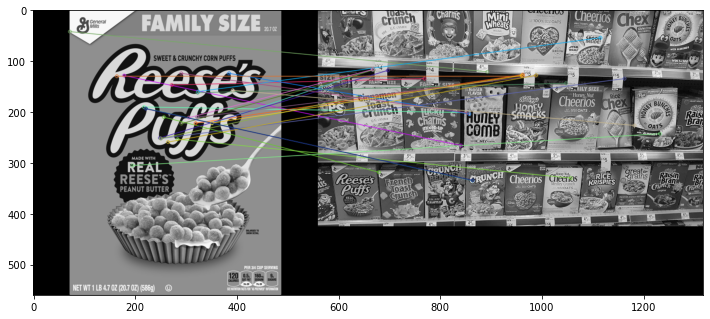

In [87]:
display(reeses_matches)

In [116]:
#2nd Method
#!pip install opencv-contrib-python --user
#sift = cv.Features2D.SIFT_create()
#or sift = cv.xfeatures2d.SIFT_create()
sift = cv.SIFT_create()

In [117]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(reeses,None)

In [118]:
bf = cv.BFMatcher()

In [119]:
matches = bf.knnMatch(des1,des2,k=2)

In [120]:
matches

[[<DMatch 0000019E64CAC6D0>, <DMatch 0000019E64CAC2D0>],
 [<DMatch 0000019E64CAC770>, <DMatch 0000019E64CAC3D0>],
 [<DMatch 0000019E64CAC570>, <DMatch 0000019E64CAC630>],
 [<DMatch 0000019E64CAC690>, <DMatch 0000019E64CAC670>],
 [<DMatch 0000019E64CAC590>, <DMatch 0000019E64CAC3B0>],
 [<DMatch 0000019E64CAC5D0>, <DMatch 0000019E64CAC250>],
 [<DMatch 0000019E64CAC510>, <DMatch 0000019E64CAC830>],
 [<DMatch 0000019E64CAC990>, <DMatch 0000019E64CAC970>],
 [<DMatch 0000019E64CAC7D0>, <DMatch 0000019E64CAC890>],
 [<DMatch 0000019E64CAC870>, <DMatch 0000019E64CAC910>],
 [<DMatch 0000019E64CAC8F0>, <DMatch 0000019E64CAC7F0>],
 [<DMatch 0000019E64CAC290>, <DMatch 0000019E64CAC9D0>],
 [<DMatch 0000019E64CAC9F0>, <DMatch 0000019E64CACA10>],
 [<DMatch 0000019E64CACA30>, <DMatch 0000019E64CACA50>],
 [<DMatch 0000019E64CACA70>, <DMatch 0000019E64CACA90>],
 [<DMatch 0000019E64CACAB0>, <DMatch 0000019E64CACAD0>],
 [<DMatch 0000019E64CACAF0>, <DMatch 0000019E64CACB10>],
 [<DMatch 0000019E64CACB30>, <D

In [121]:
len(matches)

1501

In [122]:
#ratio test
good = []

for match1, match2 in matches:
    #if match1 distance is less than 75% of match2 distance, then descriptor is a good match
    #less distance = better matches
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [123]:
good

[[<DMatch 0000019E64CAC6D0>],
 [<DMatch 0000019E64CAC770>],
 [<DMatch 0000019E64CAC570>],
 [<DMatch 0000019E64CAC690>],
 [<DMatch 0000019E64CAC590>],
 [<DMatch 0000019E64CAC5D0>],
 [<DMatch 0000019E64CAC510>],
 [<DMatch 0000019E64CAC990>],
 [<DMatch 0000019E64CAC7D0>],
 [<DMatch 0000019E64CAC870>],
 [<DMatch 0000019E64CAC8F0>],
 [<DMatch 0000019E64CAC290>],
 [<DMatch 0000019E64CAC9F0>],
 [<DMatch 0000019E64CACA30>],
 [<DMatch 0000019E64CACA70>],
 [<DMatch 0000019E64CACAB0>],
 [<DMatch 0000019E64CACAF0>],
 [<DMatch 0000019E64CACB30>],
 [<DMatch 0000019E64CACB70>],
 [<DMatch 0000019E64CACBB0>],
 [<DMatch 0000019E64CACBF0>],
 [<DMatch 0000019E64CACC30>],
 [<DMatch 0000019E64CACC70>],
 [<DMatch 0000019E64CACCB0>],
 [<DMatch 0000019E64CACCF0>],
 [<DMatch 0000019E64CACD30>],
 [<DMatch 0000019E64CACD70>],
 [<DMatch 0000019E64CACDB0>],
 [<DMatch 0000019E64CACDF0>],
 [<DMatch 0000019E64CACE30>],
 [<DMatch 0000019E64CACE70>],
 [<DMatch 0000019E64CACEB0>],
 [<DMatch 0000019E64CACEF0>],
 [<DMatch 

In [124]:
len(good)

1501

In [125]:
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

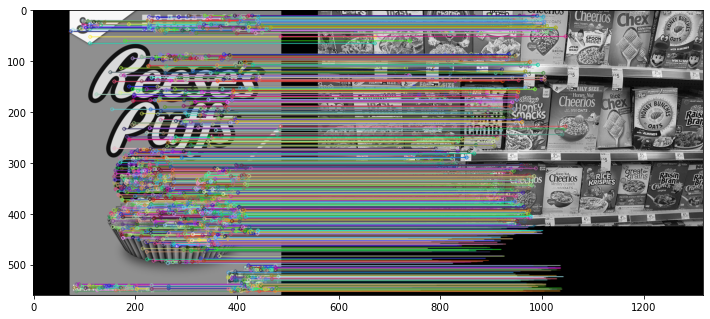

In [126]:
display(sift_matches)